# Downloading the Data

**Rain in Australia dataset**. <br>
Predict whether it will rain at the location tomorrow.

In [1]:
import opendatasets as op
op.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [2]:
import os
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [3]:
import pandas as pd

raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [4]:
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
# columns types of the data set

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# drop any rows where the value of the target column RainTomorrow in empty.

raw_df.dropna(subset=['RainTomorrow'], inplace=True)

# Preparing the Data for Training
## Training, Validation and Test Sets

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

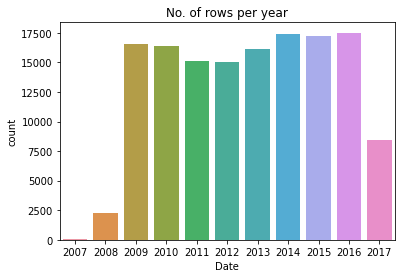

In [8]:
plt.title('No. of rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)
plt.show()

While working with **chronological data**, it's often a good idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

We'll use the data till 2014 for the training set, data from 2015 for the validation set, and the data from 2016 & 2017 for the test set.

In [9]:
years = pd.to_datetime(raw_df.Date).dt.year

In [10]:
train_data = raw_df[years<2015]
val_data = raw_df[years==2015]
test_data = raw_df[years>2015]

print('train_data.shape :', train_data.shape)
print('val_data.shape :', val_data.shape)
print('test_data.shape :', test_data.shape)

train_data.shape : (98988, 23)
val_data.shape : (17231, 23)
test_data.shape : (25974, 23)


## Input and Target Columns

In [11]:
input_cols = list(raw_df.columns[1:-1])
target_col = 'RainTomorrow'

In [12]:
train_inputs = train_data[input_cols].copy()
train_target = train_data[target_col].copy()

In [13]:
val_inputs = val_data[input_cols].copy()
val_targets = val_data[target_col].copy()

In [14]:
test_inputs = test_data[input_cols].copy()
test_targets = test_data[target_col].copy()

Iidentify the numeric and categorical columns.

In [17]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.to_list()

In [18]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [19]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


## Imputing missing numeric values

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [21]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling Numeric Features

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(raw_df[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])



In [25]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


## Encoding Categorical Data

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [28]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

C:\python\python3_9_7\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\python\python3_9_7\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
C:\python\python3_9_7\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
C:\python\python3_9_7\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

In [32]:
val_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2133,Albury,0.469340,0.724008,0.0,0.037723,0.525852,WSW,0.186047,ESE,W,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2134,Albury,0.566038,0.839319,0.0,0.037723,0.525852,NE,0.387597,ESE,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2135,Albury,0.603774,0.814745,0.0,0.037723,0.525852,NNE,0.325581,NE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2136,Albury,0.813679,0.716446,0.0,0.037723,0.525852,NNE,0.271318,ESE,W,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2137,Albury,0.648585,0.756144,0.0,0.037723,0.525852,E,0.209302,SSE,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,Uluru,0.683962,0.746692,0.0,0.037723,0.525852,E,0.356589,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144914,Uluru,0.625000,0.778828,0.0,0.037723,0.525852,ESE,0.372093,E,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144915,Uluru,0.613208,0.792060,0.0,0.037723,0.525852,E,0.387597,E,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144916,Uluru,0.672170,0.826087,0.0,0.037723,0.525852,E,0.410853,E,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
# drop the textual categorical columns, so that we're left with just numeric data.
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [34]:
X_val

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2133,0.469340,0.724008,0.0,0.037723,0.525852,0.186047,0.053846,0.126437,0.45,0.14,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2134,0.566038,0.839319,0.0,0.037723,0.525852,0.387597,0.069231,0.103448,0.45,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2135,0.603774,0.814745,0.0,0.037723,0.525852,0.325581,0.153846,0.229885,0.35,0.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2136,0.813679,0.716446,0.0,0.037723,0.525852,0.271318,0.053846,0.080460,0.46,0.37,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2137,0.648585,0.756144,0.0,0.037723,0.525852,0.209302,0.053846,0.103448,0.60,0.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,0.683962,0.746692,0.0,0.037723,0.525852,0.356589,0.269231,0.229885,0.23,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144914,0.625000,0.778828,0.0,0.037723,0.525852,0.372093,0.230769,0.356322,0.17,0.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144915,0.613208,0.792060,0.0,0.037723,0.525852,0.387597,0.253846,0.252874,0.12,0.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144916,0.672170,0.826087,0.0,0.037723,0.525852,0.410853,0.153846,0.195402,0.12,0.12,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Training and Visualizing Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [37]:
%%time

model.fit(X_train, train_target)

Wall time: 3.15 s


DecisionTreeClassifier(random_state=42)

## Evaluation

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
train_pred = model.predict(X_train)
train_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [40]:
pd.value_counts(train_pred)

No     76707
Yes    22281
dtype: int64

In [42]:
# decision tree also returns probabilities for each prediction
train_prob = model.predict_proba(X_train)
train_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [44]:
# accuracy of its predictions

accuracy_score(train_target, train_pred)

0.9999797955307714

Evaluate the model on the validation set too.

We can make predictions and compute accuracy in one step using **model.score**

In [45]:
model.score(X_val, val_targets)

0.7921188555510418

In [47]:
val_targets.value_counts() / len(val_targets)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

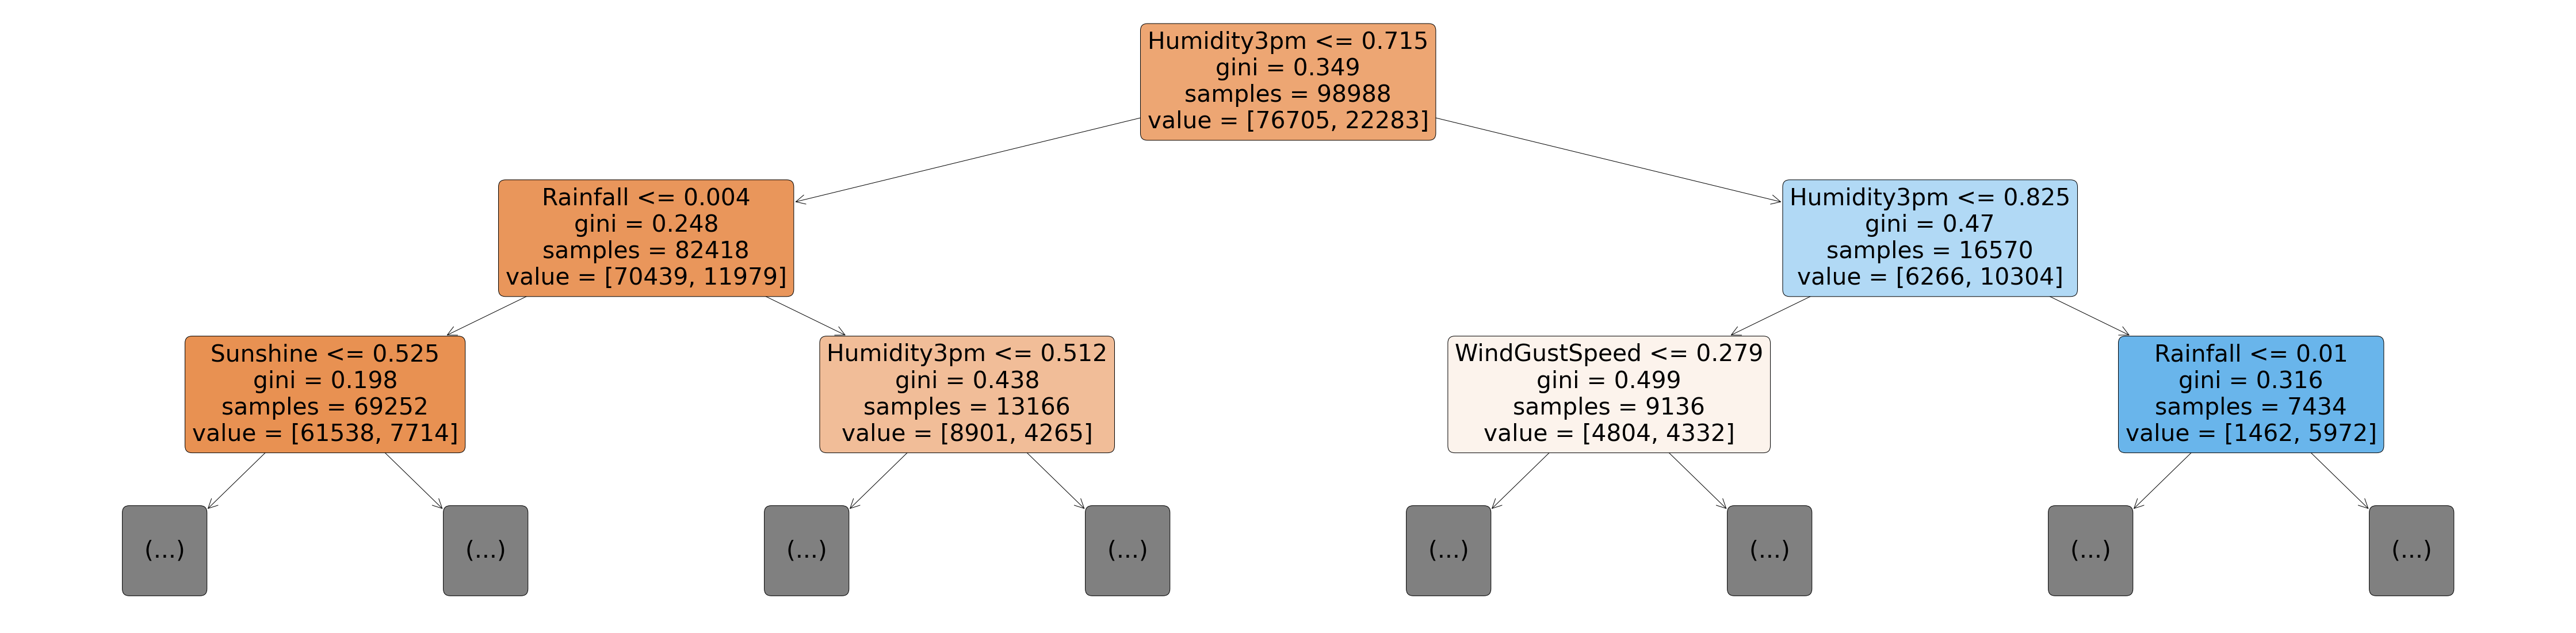

In [50]:
# Visualization

from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True, rounded=True)
plt.show()

In [52]:
# depth of the tree that was created

model.tree_.max_depth

48

In [53]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

## Feature Importance

In [54]:
# Decision tree assigns an "importance" value to each feature. 
# These values can be used to interpret the results given by a decision tree.

model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [55]:
importance_df = pd.DataFrame({'feature': X_train.columns, 
                             'importance': model.feature_importances_
                             }).sort_values('importance', ascending=False)

In [57]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


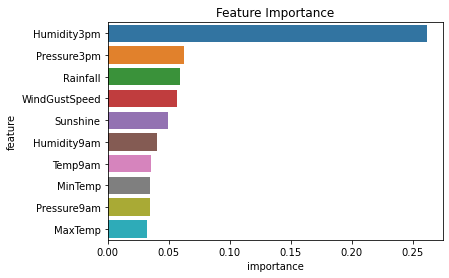

In [58]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning and Overfitting
The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting. <br>
These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are learned from the data. We'll explore a couple of hyperparameters:

- max_depth
- max_leaf_nodes

In [59]:
# By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, 
# which may lead to better generalization

model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [60]:
model.fit(X_train, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [61]:
# We can compute the accuracy of the model on the training and validation sets using model.score
model.score(X_train, train_target)

0.8291308037337859

In [62]:
model.score(X_val, val_targets)

0.8334397307178921

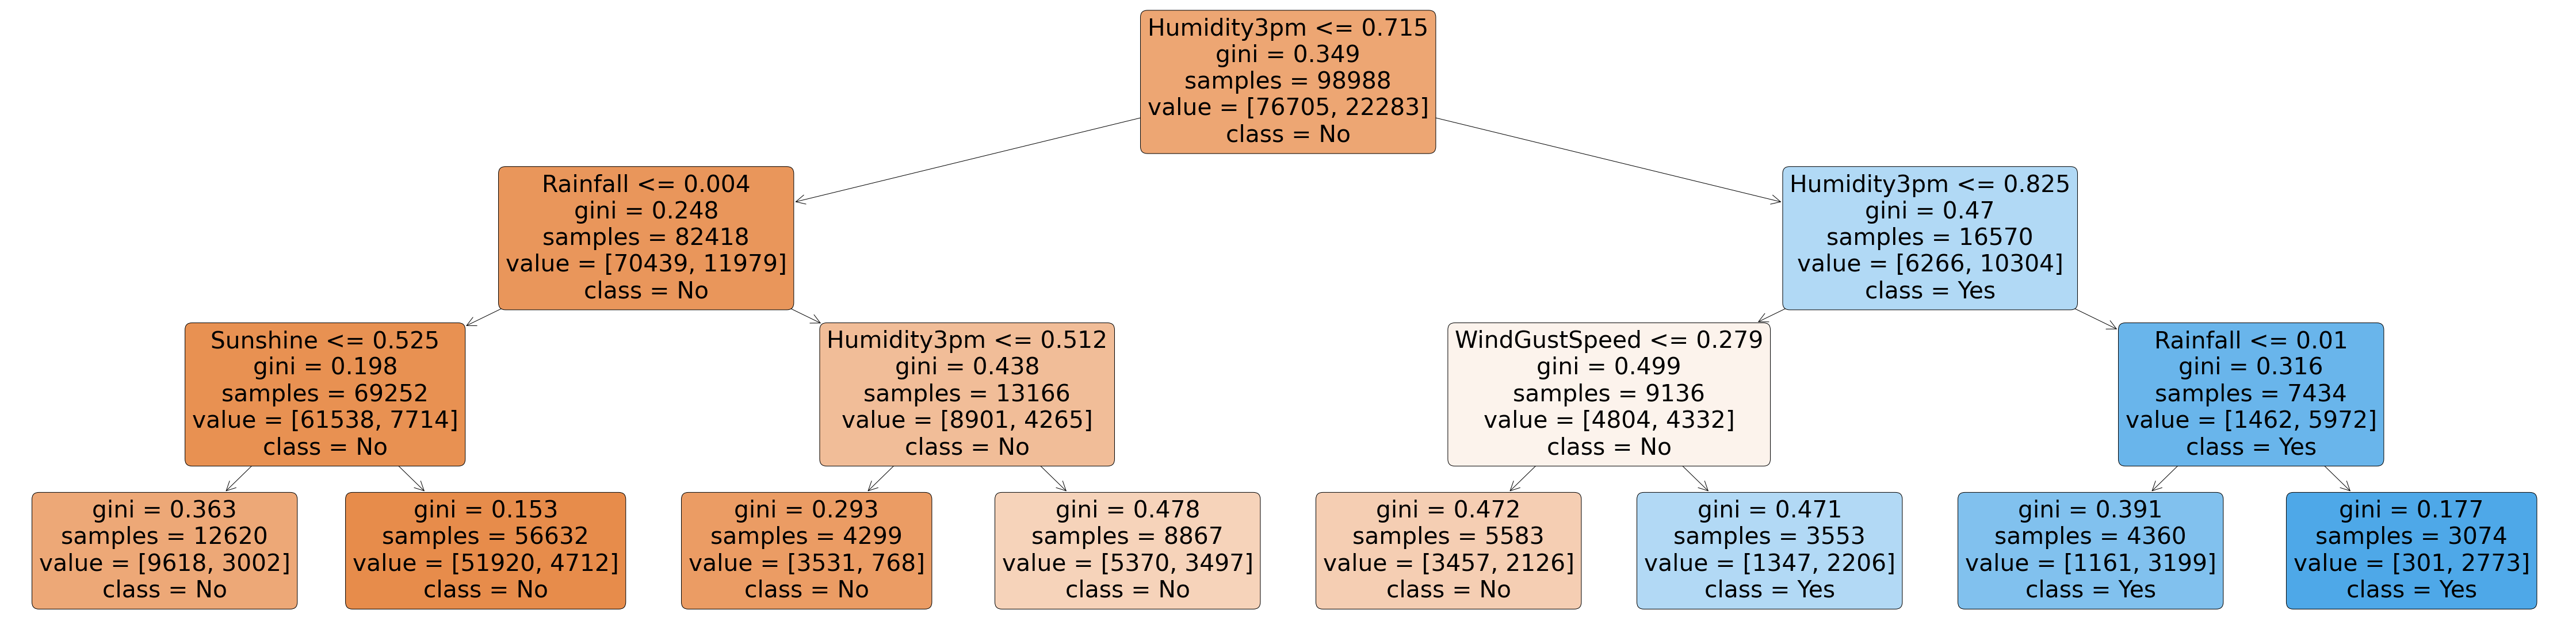

In [63]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [64]:
# Let's experiment with different depths using a helper function.
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_target)
    train_acc = 1 - model.score(X_train, train_target)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [66]:
%%time

error_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

Wall time: 1min 24s


In [67]:
error_df

,Max depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157333


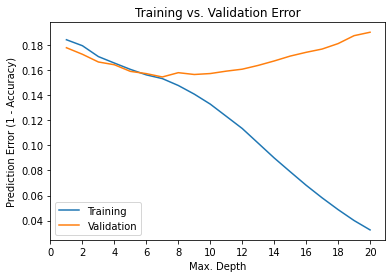

In [71]:
plt.figure()
plt.plot(error_df['Max depth'], error_df['Training Error'])
plt.plot(error_df['Max depth'], error_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation']);

In [72]:
# max_leaf_nodes
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train, train_target)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [74]:
model.score(X_train, train_target)

0.8480421869317493

In [75]:
model.score(X_val, val_targets)

0.8442342290058615

In [76]:
model.tree_.max_depth

12